In [19]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('Social_Network_Ads.csv')

In [21]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [23]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

In [24]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [25]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:3]
y= df.iloc[:,-1]

In [26]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [27]:
# X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state =22)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [38]:
X_scaled.shape

(400, 3)

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [34]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=3))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                40        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_scaled,y,epochs=50,batch_size=1,validation_split=0.2)

Epoch 1/50
320/320 [==============================] - 1s 1ms/step - loss: 0.3049 - accuracy: 0.8469 - val_loss: 0.3694 - val_accuracy: 0.8625
Epoch 2/50
320/320 [==============================] - 0s 1ms/step - loss: 0.3024 - accuracy: 0.8500 - val_loss: 0.3733 - val_accuracy: 0.8375
Epoch 3/50
320/320 [==============================] - 0s 1ms/step - loss: 0.3002 - accuracy: 0.8500 - val_loss: 0.3641 - val_accuracy: 0.8375
Epoch 4/50
320/320 [==============================] - 0s 1ms/step - loss: 0.2974 - accuracy: 0.8594 - val_loss: 0.3657 - val_accuracy: 0.8000
Epoch 5/50
320/320 [==============================] - 0s 1ms/step - loss: 0.2926 - accuracy: 0.8531 - val_loss: 0.3475 - val_accuracy: 0.8375
Epoch 6/50
320/320 [==============================] - 0s 1ms/step - loss: 0.2872 - accuracy: 0.8594 - val_loss: 0.3308 - val_accuracy: 0.8750
Epoch 7/50
320/320 [==============================] - 0s 1ms/step - loss: 0.2767 - accuracy: 0.8750 - val_loss: 0.3078 - val_accuracy: 0.9000
Epoch 

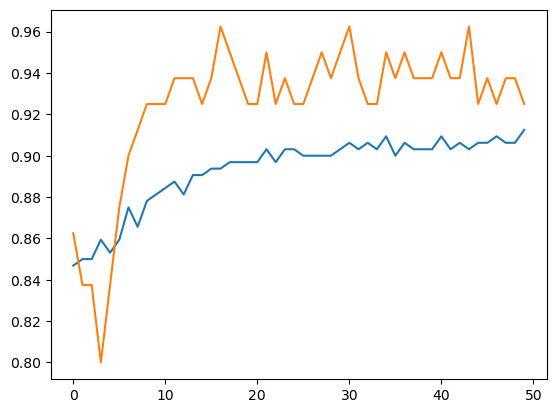

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

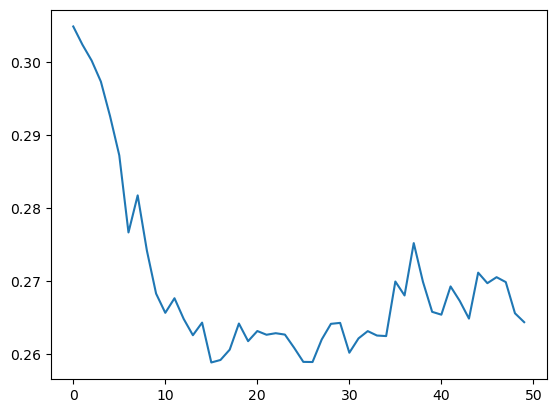

In [47]:
plt.plot(history.history['loss'])

In [52]:
 batch_model = Sequential()
    
batch_model.add(Dense(10, activation = 'relu',input_dim=3 ))
batch_model.add(Dense(10, activation = 'relu'))
batch_model.add(Dense(1, activation = 'sigmoid' ))

In [58]:
batch_model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])
batch_history = batch_model.fit(X_scaled,y, epochs=50, batch_size=400, validation_split=0.2)

Epoch 1/50
1/1 [==============================] - 0s 473ms/step - loss: 0.5581 - accuracy: 0.7531 - val_loss: 0.7701 - val_accuracy: 0.4500
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 0.5492 - accuracy: 0.7656 - val_loss: 0.7663 - val_accuracy: 0.4500
Epoch 3/50
1/1 [==============================] - 0s 24ms/step - loss: 0.5431 - accuracy: 0.7688 - val_loss: 0.7631 - val_accuracy: 0.4375
Epoch 4/50
1/1 [==============================] - 0s 24ms/step - loss: 0.5382 - accuracy: 0.7594 - val_loss: 0.7602 - val_accuracy: 0.4375
Epoch 5/50
1/1 [==============================] - 0s 24ms/step - loss: 0.5339 - accuracy: 0.7594 - val_loss: 0.7576 - val_accuracy: 0.4375
Epoch 6/50
1/1 [==============================] - 0s 25ms/step - loss: 0.5301 - accuracy: 0.7594 - val_loss: 0.7551 - val_accuracy: 0.4375
Epoch 7/50
1/1 [==============================] - 0s 24ms/step - loss: 0.5266 - accuracy: 0.7594 - val_loss: 0.7526 - val_accuracy: 0.4375
Epoch 8/50
1/1 [==========

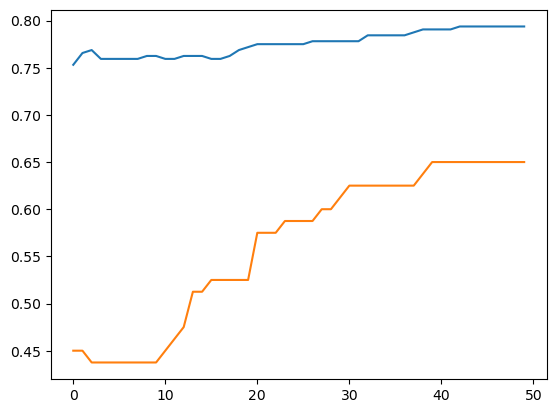

In [63]:
plt.plot(batch_history.history['accuracy'])
plt.plot(batch_history.history['val_accuracy'])